In [68]:
import numpy as np
import pandas as pd
from astropy.table import Table
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import umap
import seaborn as sns; sns.set()
sns.set_theme(style="ticks")

/home/luisangel/luis-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-08-24 14:15:10.078790: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 14:15:10.159031: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-24 14:15:10.555866: W tensorflow/compiler/xla/stream_executor/platform/default

In [69]:
df = pd.read_csv("../Luis_arzd099bej.csv")

In [70]:
df.columns

Index(['idPNMain', 'PNG', 'Name', 'PNstat', 'RAJ2000', 'DECJ2000', 'DRAJ2000',
       'DDECJ2000', 'Glon', 'Glat', 'Catalogue', 'MajDiam', 'MinDiam',
       'PAdiam', 'EPA', 'mainClass', 'subClass', 'tbRadioCont_Flux_3cm',
       'tbRadioCont_Flux_6cm', 'tbRadioCont_Flux_11cm',
       'tbRadioCont_Flux_13cm', 'tbRadioCont_Flux_20cm',
       'tbRadioCont_Flux_36cm', 'tbRadioCont_Flux_2cm', 'tbIRFlux_Flux_J',
       'tbIRFlux_Flux_H', 'tbIRFlux_Flux_Ks', 'tbIRFlux_Flux_8um',
       'tbIRFlux_Flux_12um', 'tbIRFlux_Flux_22um', 'tbIRFlux_Flux_24um',
       'tbIRFlux_Flux_25um', 'tbIRFlux_Flux_60um', 'tbIRFlux_Flux_70um',
       'tbIRFlux_Flux_100um', 'tbIRFlux_Flux_160um', 'tbIRFlux_Flux_250um',
       'tbIRFlux_Flux_350um', 'tbIRFlux_Flux_500um'],
      dtype='object')

In [71]:
df.head()

idPNMain         PNG     Name PNstat      RAJ2000      DECJ2000   DRAJ2000  \
0         8  000.0+02.0    K 6-4      T   17:37:42.9  -27:49:09.55  264.42886   
1         9  000.1-01.9  JaSt 93      T  17:53:23.78   -29:49:45.5  268.34908   
2        10  000.1-08.0     SB 1      T   18:18:48.5  -32:47:55.32  274.70200   
3        11  000.1-01.1   M 3-43      T   17:50:24.3  -29:25:18.70  267.60123   
4        12  000.1+02.6   Al 2-J      T   17:35:35.4  -27:24:04.97  263.89753   

   DDECJ2000     Glon     Glat  ... tbIRFlux_Flux_22um  tbIRFlux_Flux_24um  \
0  -27.81932  0.03035  2.06620  ...                NaN                 NaN   
1  -29.82931  0.10451 -1.91213  ...                NaN                 NaN   
2  -32.79870  0.11982 -8.09701  ...                NaN                 NaN   
3  -29.42186  0.12383 -1.14515  ...                NaN                 NaN   
4  -27.40138  0.13036  2.68778  ...                NaN                 NaN   

   tbIRFlux_Flux_25um  tbIRFlux_Flux_60um  tbIRFlux_Flux_70um  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                0.95                1.84                 NaN   

  tbIRFlux_Flux_100um tbIRFlux_Flux_160um  tbIRFlux_Flux_250um  \
0                 NaN                 NaN                  NaN   
1                 NaN                 NaN                  NaN   
2                 NaN                 NaN                  NaN   
3                 NaN                 NaN                  NaN   
4               22.03                 NaN                  NaN   

   tbIRFlux_Flux_350um  tbIRFlux_Flux_500um  
0                  NaN                  NaN  
1                  NaN                  NaN  
2                  NaN                  NaN  
3                  NaN                  NaN  
4                  NaN                  NaN  

[5 rows x 39 columns]

In [72]:
df["PNstat"]

0       T
1       T
2       T
3       T
4       T
       ..
3878    P
3879    T
3880    P
3881    P
3882    L
Name: PNstat, Length: 3883, dtype: object

In [73]:
# Mask
mask_t = df["PNstat"] == "T"
mask_p = df["PNstat"] == "P"
mask_l = df["PNstat"] == "L"

df_t = df[mask_t]
df_p = df[mask_p]
df_l = df[mask_l]

print("Number of true PN:", len(df_t)) 
print("Number of probable PN:", len(df_p)) 
print("Number of likely PN:", len(df_l)) 

Number of true PN: 2710
Number of probable PN: 710
Number of likely PN: 463


# With GAIA, PS and IR surveys

In [74]:
df1 = pd.read_csv("../GAIADR3-PSDR1-allwise3arc-CSstars.csv")

In [75]:
for i  in df1.columns:
    print(i)

recno
Astrom
PNG
OName
GaiaEDR3
Group
RA_ICRS
DE_ICRS
Dang
Gmag
BP-RP
AV
(BP-RP)0
_RA_icrs
_DE_icrs
DR3Name
RAdeg
DEdeg
errHalfMaj
errHalfMin
errPosAng
SolID
Source
RandomI
e_RAdeg
e_DEdeg
Plx
e_Plx
RPlx
PM
pmRA
e_pmRA
pmDE
e_pmDE
RADEcor
RAPlxcor
RApmRAcor
RApmDEcor
DEPlxcor
DEpmRAcor
DEpmDEcor
PlxpmRAcor
PlxpmDEcor
pmRApmDEcor
NAL
NAC
NgAL
NbAL
gofAL
chi2AL
epsi
sepsi
Solved
APF
nueff
pscol
e_pscol
RApscolCorr
DEpscolCorr
PlxpscolCorr
pmRApscolCorr
pmDEpscolCorr
MatchObsA
Nper
amax
MatchObs
IPDgofha
IPDgofhp
IPDfmp
IPDfow
RUWE
Dup
o_Gmag
FG
e_FG
RFG
Gmag_x
e_Gmag
o_BPmag
FBP
e_FBP
RFBP
BPmag
e_BPmag
o_RPmag
FRP
e_FRP
RFRP
RPmag
e_RPmag
E(BP/RP)
NBPcont
NBPblend
NRPcont
NRPblend
Mode
BP-RP_x
BP-G
G-RP
RV
e_RV
n_RV
o_RV
o_RVd
RVNper
RVS/N
RVgof
RVchi2
RVTdur
RVamp
RVtempTeff
RVtemplogg
RVtemp[Fe/H]
Vatmparam
vbroad
e_Vbroad
o_Vbroad
GRVSmag
e_GRVSmag
o_GRVSmag
RVSS/N
VarFlag
PQSO
PGal
PSS
Teff
b_Teff_x
B_Teff_xa
logg
b_logg_x
B_logg_xa
[Fe/H]
b_[Fe/H]_x
B_[Fe/H]_xa
Dist
b_Dist_x
B_Dist

In [76]:
#Selecting columns
col = ["recno",
"Astrom",
"PNG",
"OName",
"GaiaEDR3",
"Group",
"RA_ICRS",
"DE_ICRS",
"Dang",
"Gmag",
"BP-RP",
"AV",
"(BP-RP)0",
"_RA_icrs",
"_DE_icrs",
"DR3Name",
"RAdeg",
"DEdeg",
"e_RAdeg",
"e_DEdeg",
"Plx",
"e_Plx",
"RPlx",
"pmRA",
"e_pmRA",
"pmDE",
"e_pmDE",
"Gmag_x",
"e_Gmag",
"o_BPmag",
"FBP",
"e_FBP",
"RFBP",
"BPmag",
"e_BPmag",
"o_RPmag",
"FRP",
"e_FRP",
"RFRP",
"RPmag",
"e_RPmag",
"E(BP/RP)",
"BP-RP_x",
"BP-G",
"G-RP",
"RV",
"e_RV",
"n_RV",
"o_RV",
"o_RVd",
"Teff",
"b_Teff_x",
"B_Teff_xa",
"logg",
"b_logg_x",
"B_logg_xa",
"[Fe/H]",
"b_[Fe/H]_x",
"B_[Fe/H]_xa",
"Dist",
"b_Dist_x",
"B_Dist_xa",
"A0",
"b_A0_x",
"B_A0_xa",
"E(BP-RP)",
"b_E(BP-RP)_x",
"B_E(BP-RP)_xa",
"gmag_xa",
"e_gmag_x",
"gKmag",
"e_gKmag",
"gFlags",
"rmag",
"e_rmag",
"rKmag",
"e_rKmag",
"rFlags",
"imag",
"e_imag",
"iKmag",
"e_iKmag",
"iFlags",
"zmag",
"e_zmag",
"zKmag",
"e_zKmag",
"zFlags",
"ymag",
"e_ymag",
"yKmag",
"e_yKmag",
"yFlags",
"angDist_x",
"AllWISE",
"W1mag",
"W2mag",
"W3mag",
"W4mag",
"Jmag",
"Hmag",
"Kmag",
"e_W1mag",
"e_W2mag",
"e_W3mag",
"e_W4mag",
"e_Jmag",
"e_Hmag",
"e_Kmag",
"ID",
"angDist_xa"]

In [77]:
df_cat = df1[col]
df_cat

recno Astrom              PNG                   OName  \
0     1006         PN G189.8+07.7                     M1-7   
1     1007      *  PN G190.3-17.7                     J320   
2     1009      *  PN G191.4+33.1                      TK1   
3     1010         PN G192.5+07.2                    HaWe8   
4     1012         PN G192.9+00.6   IPHASXJ061602.5+175920   
..     ...    ...              ...                     ...   
661   2018         PN G359.4-03.4                    H2-33   
662   2022         PN G359.6+02.2                    Al2-K   
663   2024         PN G359.7+06.0            BMPJ1721-2554   
664   2033         PN G359.9+03.7                   Th3-28   
665   2034      *  PN G359.9+05.1                     M3-9   

                GaiaEDR3 Group   RA_ICRS  DE_ICRS   Dang   Gmag  ...    Kmag  \
0    3382861038566672000     B   99.3372  24.0098   0.31  19.79  ...  12.966   
1    3291783576991686784     A   76.3928  10.7064   0.56  14.45  ...  13.222   
2     708990321934310784     A  126.7730  31.5023   0.30  15.66  ...  15.727   
3    3378885131503804544     B  100.0404  21.4171   0.11  18.85  ...     NaN   
4    3370371926501630464     B   94.0072  17.9905  12.87  21.03  ...  15.376   
..                   ...   ...       ...      ...    ...    ...  ...     ...   
661  4044019130131217408     A  269.5523 -31.1351   0.43  18.85  ...     NaN   
662  4060495277524149504     B  264.0591 -28.0129   0.21  19.22  ...     NaN   
663  4109913205565555072     A  260.4919 -25.9068   0.48  19.32  ...     NaN   
664  4061565338478409088     B  262.7367 -26.9864   0.10  17.56  ...  12.717   
665  4109665059557150592     B  261.4307 -26.1987   0.10  17.68  ...     NaN   

     e_W1mag  e_W2mag  e_W3mag  e_W4mag e_Jmag  e_Hmag  e_Kmag  \
0      0.022    0.021    0.013    0.017  0.100     NaN     NaN   
1      0.035    0.035    0.035    0.045  0.068   0.100   0.073   
2      0.116      NaN      NaN      NaN  0.145     NaN   0.201   
3      0.142      NaN      NaN      NaN    NaN     NaN     NaN   
4      0.047    0.108      NaN      NaN  0.172   0.163   0.208   
..       ...      ...      ...      ...    ...     ...     ...   
661    0.128    0.068    0.015    0.024    NaN     NaN     NaN   
662    0.048    0.032    0.017    0.017    NaN     NaN     NaN   
663      NaN      NaN      NaN    0.097    NaN     NaN     NaN   
664    0.076    0.072    0.070    0.060  0.030   0.026   0.030   
665    0.033    0.021    0.013    0.016    NaN     NaN     NaN   

                      ID  angDist_xa  
0     990124201351020603    0.286073  
1     769110601351033374    1.947390  
2    1270131801351016242    0.874153  
3    1000121201351042709    0.322873  
4     935118101351019569    2.884920  
..                   ...         ...  
661  2700031901351058174    0.776677  
662  2640028801351059214    2.506303  
663  2600025801351024140    1.834459  
664  2619027301351048945    0.222959  
665  2616025801351015498    0.987979  

[666 rows x 111 columns]

In [78]:
#Some criteria to get objets with very good photometry
mask = (df_cat["e_gmag_x"] <= 0.2) & (df_cat["e_rmag"] <= 0.2) & (df_cat["e_imag"] <= 0.2) & (df_cat["e_zmag"] <= 0.2) & (df_cat["e_W1mag"] <= 0.3) & (df_cat["e_W2mag"] <= 0.3) & (df_cat["e_W3mag"] <= 0.3) & (df_cat["e_W4mag"] <= 0.3) 

In [79]:
df_mask = df_cat[mask]
df_mask        

recno Astrom              PNG    OName             GaiaEDR3 Group  \
0     1006         PN G189.8+07.7      M1-7  3382861038566672000     B   
8     1019         PN G197.2-14.2   Abell10  3333922699432278656     B   
11    1023         PN G198.6-06.3   Abell12  3329653849828221696     A   
12    1026         PN G199.4+14.3     PaJy1  3362175922014398720     B   
17    1035         PN G205.8-26.7    MaC2-1  3211200438511961088     A   
..     ...    ...              ...      ...                  ...   ...   
658   2014         PN G359.3-00.9       Hb5  4056807274938145024     A   
659   2015         PN G359.3-01.8     M3-44  4056355822397882880     B   
662   2022         PN G359.6+02.2     Al2-K  4060495277524149504     B   
664   2033         PN G359.9+03.7    Th3-28  4061565338478409088     B   
665   2034      *  PN G359.9+05.1      M3-9  4109665059557150592     B   

      RA_ICRS  DE_ICRS  Dang   Gmag  ...    Kmag  e_W1mag  e_W2mag  e_W3mag  \
0     99.3372  24.0098  0.31  19.79  ...  12.966    0.022    0.021    0.013   
8     82.9404   6.9339  0.05  18.71  ...     NaN    0.028    0.032    0.051   
11    90.5833   9.6538  0.79  18.65  ...     NaN    0.050    0.028    0.016   
12   110.0064  18.2905  1.11  12.79  ...  11.755    0.022    0.020    0.014   
17    75.9244  -6.1675  0.07  15.81  ...  14.711    0.026    0.026    0.019   
..        ...      ...   ...    ...  ...     ...      ...      ...      ...   
658  266.9840 -29.9942  0.64  17.70  ...   9.854    0.023    0.018    0.082   
659  267.8288 -30.3981  0.38  16.03  ...   9.923    0.037    0.032    0.013   
662  264.0591 -28.0129  0.21  19.22  ...     NaN    0.048    0.032    0.017   
664  262.7367 -26.9864  0.10  17.56  ...  12.717    0.076    0.072    0.070   
665  261.4307 -26.1987  0.10  17.68  ...     NaN    0.033    0.021    0.013   

     e_W4mag e_Jmag  e_Hmag  e_Kmag                   ID  angDist_xa  
0      0.017  0.100     NaN     NaN   990124201351020603    0.286073  
8      0.125    NaN     NaN     NaN   823107501351000208    0.296123  
11     0.023    NaN     NaN     NaN   903109001351051549    0.531342  
12     0.015  0.026   0.026   0.029  1094118101351025156    0.131006  
17     0.023  0.043   0.075   0.104   759006101351026627    0.107905  
..       ...    ...     ...     ...                  ...         ...  
658    0.010    NaN   0.056   0.043  2678030301351040559    0.778358  
659    0.009  0.056   0.053   0.039  2678030301351032156    0.143417  
662    0.017    NaN     NaN     NaN  2640028801351059214    2.506303  
664    0.060  0.030   0.026   0.030  2619027301351048945    0.222959  
665    0.016    NaN     NaN     NaN  2616025801351015498    0.987979  

[373 rows x 111 columns]

In [80]:
#Selecting colum only with the magnitudes
col_mag = ["Gmag_x", "BPmag", "RPmag", "gmag_xa", "rmag", "imag", "zmag", "W1mag",
"W2mag",
"W3mag",
"W4mag"]

In [81]:
df_mask_mag = df_mask[col_mag]
df_mask_mag

Gmag_x      BPmag      RPmag  gmag_xa     rmag     imag     zmag  \
0    19.790970  15.533729  15.367260  15.5573  15.4212  17.2374  17.4121   
8    18.711565  18.327960  17.897266  18.1998  18.2947  18.3691  18.4056   
11   18.654491  18.295073  18.422157  17.4920  17.3062  18.3536  17.9559   
12   12.786484  12.691720  12.715131  12.6732  12.8491  13.2788  13.3979   
17   15.809883  14.512877  14.895333  14.2929  15.0087  15.8881  16.1101   
..         ...        ...        ...      ...      ...      ...      ...   
658  17.707779  13.572449  12.652141  13.8539  13.6154  14.3008  13.5740   
659  16.028017  16.392097  14.311263  17.8871  15.5587  15.3707  14.5836   
662  19.217394  19.522596  17.230371  20.1665  18.9566  18.2555  17.5064   
664  17.557905  18.784569  16.403152  19.3583  17.7600  16.8548  16.3610   
665  17.680912  17.728752  16.544973  17.9654  17.4667  17.2022  17.0427   

      W1mag   W2mag  W3mag  W4mag  
0    11.584  10.568  6.118  2.910  
8    14.015  13.190  9.652  7.298  
11   12.524  11.419  6.966  3.680  
12   10.161   9.204  5.405  2.262  
17   13.706  12.798  7.888  4.655  
..      ...     ...    ...    ...  
658   7.143   6.065  0.322 -2.338  
659   9.226   8.982  4.086 -0.455  
662  10.910  10.089  5.935  2.648  
664  12.850  13.077  9.633  6.135  
665  11.664  10.607  4.452  0.791  

[373 rows x 11 columns]

In [82]:
from itertools import combinations
# Generate all combinations of magnitude columns
color_index_pairs = list(combinations(df_mask_mag, 2))

In [83]:
color_index_pairs

[('Gmag_x', 'BPmag'),
 ('Gmag_x', 'RPmag'),
 ('Gmag_x', 'gmag_xa'),
 ('Gmag_x', 'rmag'),
 ('Gmag_x', 'imag'),
 ('Gmag_x', 'zmag'),
 ('Gmag_x', 'W1mag'),
 ('Gmag_x', 'W2mag'),
 ('Gmag_x', 'W3mag'),
 ('Gmag_x', 'W4mag'),
 ('BPmag', 'RPmag'),
 ('BPmag', 'gmag_xa'),
 ('BPmag', 'rmag'),
 ('BPmag', 'imag'),
 ('BPmag', 'zmag'),
 ('BPmag', 'W1mag'),
 ('BPmag', 'W2mag'),
 ('BPmag', 'W3mag'),
 ('BPmag', 'W4mag'),
 ('RPmag', 'gmag_xa'),
 ('RPmag', 'rmag'),
 ('RPmag', 'imag'),
 ('RPmag', 'zmag'),
 ('RPmag', 'W1mag'),
 ('RPmag', 'W2mag'),
 ('RPmag', 'W3mag'),
 ('RPmag', 'W4mag'),
 ('gmag_xa', 'rmag'),
 ('gmag_xa', 'imag'),
 ('gmag_xa', 'zmag'),
 ('gmag_xa', 'W1mag'),
 ('gmag_xa', 'W2mag'),
 ('gmag_xa', 'W3mag'),
 ('gmag_xa', 'W4mag'),
 ('rmag', 'imag'),
 ('rmag', 'zmag'),
 ('rmag', 'W1mag'),
 ('rmag', 'W2mag'),
 ('rmag', 'W3mag'),
 ('rmag', 'W4mag'),
 ('imag', 'zmag'),
 ('imag', 'W1mag'),
 ('imag', 'W2mag'),
 ('imag', 'W3mag'),
 ('imag', 'W4mag'),
 ('zmag', 'W1mag'),
 ('zmag', 'W2mag'),
 ('zmag', '

In [84]:
# Calculate color indices and create 'color' columns iteratively
for index_pair in color_index_pairs:
    color_index_name = f'{index_pair[0]}_{index_pair[1]}'
    df_mask_mag[color_index_name] = df_mask_mag[index_pair[0]] - df_mask_mag[index_pair[1]]    

/tmp/ipykernel_375671/4058293610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mask_mag[color_index_name] = df_mask_mag[index_pair[0]] - df_mask_mag[index_pair[1]]
/tmp/ipykernel_375671/4058293610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mask_mag[color_index_name] = df_mask_mag[index_pair[0]] - df_mask_mag[index_pair[1]]
/tmp/ipykernel_375671/4058293610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [85]:
len(df_mask_mag)

373

In [86]:
# Dropping magnitude columns
df_mask_colors = df_mask_mag.drop(columns=col_mag)

In [87]:
df_mask_colors

Gmag_x_BPmag  Gmag_x_RPmag  Gmag_x_gmag_xa  Gmag_x_rmag  Gmag_x_imag  \
0        4.257241      4.423710        4.233670     4.369770     2.553570   
8        0.383605      0.814299        0.511765     0.416865     0.342465   
11       0.359418      0.232334        1.162491     1.348291     0.300891   
12       0.094764      0.071353        0.113284    -0.062616    -0.492316   
17       1.297006      0.914550        1.516983     0.801183    -0.078217   
..            ...           ...             ...          ...          ...   
658      4.135330      5.055638        3.853879     4.092379     3.406979   
659     -0.364080      1.716754       -1.859083     0.469317     0.657317   
662     -0.305202      1.987023       -0.949106     0.260794     0.961894   
664     -1.226664      1.154753       -1.800395    -0.202095     0.703105   
665     -0.047840      1.135939       -0.284488     0.214212     0.478712   

     Gmag_x_zmag  Gmag_x_W1mag  Gmag_x_W2mag  Gmag_x_W3mag  Gmag_x_W4mag  ...  \
0       2.378870      8.206970      9.222970     13.672970     16.880970  ...   
8       0.305965      4.696565      5.521565      9.059565     11.413565  ...   
11      0.698591      6.130491      7.235491     11.688491     14.974491  ...   
12     -0.611416      2.625484      3.582484      7.381484     10.524484  ...   
17     -0.300217      2.103883      3.011883      7.921883     11.154883  ...   
..           ...           ...           ...           ...           ...  ...   
658     4.133779     10.564779     11.642779     17.385779     20.045779  ...   
659     1.444417      6.802017      7.046017     11.942017     16.483017  ...   
662     1.710994      8.307394      9.128394     13.282394     16.569394  ...   
664     1.196905      4.707905      4.480905      7.924905     11.422905  ...   
665     0.638212      6.016912      7.073912     13.228912     16.889912  ...   

     zmag_W1mag  zmag_W2mag  zmag_W3mag  zmag_W4mag  W1mag_W2mag  W1mag_W3mag  \
0        5.8281      6.8441     11.2941     14.5021        1.016        5.466   
8        4.3906      5.2156      8.7536     11.1076        0.825        4.363   
11       5.4319      6.5369     10.9899     14.2759        1.105        5.558   
12       3.2369      4.1939      7.9929     11.1359        0.957        4.756   
17       2.4041      3.3121      8.2221     11.4551        0.908        5.818   
..          ...         ...         ...         ...          ...          ...   
658      6.4310      7.5090     13.2520     15.9120        1.078        6.821   
659      5.3576      5.6016     10.4976     15.0386        0.244        5.140   
662      6.5964      7.4174     11.5714     14.8584        0.821        4.975   
664      3.5110      3.2840      6.7280     10.2260       -0.227        3.217   
665      5.3787      6.4357     12.5907     16.2517        1.057        7.212   

     W1mag_W4mag  W2mag_W3mag  W2mag_W4mag  W3mag_W4mag  
0          8.674        4.450        7.658        3.208  
8          6.717        3.538        5.892        2.354  
11         8.844        4.453        7.739        3.286  
12         7.899        3.799        6.942        3.143  
17         9.051        4.910        8.143        3.233  
..           ...          ...          ...          ...  
658        9.481        5.743        8.403        2.660  
659        9.681        4.896        9.437        4.541  
662        8.262        4.154        7.441        3.287  
664        6.715        3.444        6.942        3.498  
665       10.873        6.155        9.816        3.661  

[373 rows x 55 columns]

# 1. PCA

In [88]:
# Standarized the data
X_stand = StandardScaler().fit_transform(df_mask_colors)

In [89]:
# Creating the PCA 
pca = PCA(n_components=10)
pca.fit(X_stand)

PCA(n_components=10)

In [90]:
X_pca = pca.transform(X_stand)

In [91]:
print("Porcentage:", pca.explained_variance_ratio_)
print("Singular Value:", pca.singular_values_)
print("Component:", pca.components_) # eigevectors
print("Sorted components:", pca.explained_variance_) # eigenvalues

Porcentage: [0.51123798 0.22039992 0.09532481 0.07383692 0.03160787 0.02175432
 0.018219   0.01132592 0.01093228 0.00536098]
Singular Value: [102.41116688  67.24213254  44.22203649  38.91997353  25.46439553
  21.12557553  19.33294692  15.24307475  14.97583706  10.48715493]
Component: [[ 2.27492076e-02  1.12922427e-01 -1.90122199e-02  7.26215238e-02
   1.12503830e-01  1.25933190e-01  1.73230807e-01  1.75292253e-01
   1.70678058e-01  1.62288320e-01  1.28655581e-01 -9.59231014e-02
   1.02780497e-01  7.32760970e-02  9.90524130e-02  1.71301425e-01
   1.77467073e-01  1.82423097e-01  1.72127099e-01 -1.28577410e-01
  -1.18337589e-01 -8.71596772e-02  1.35359945e-02  1.65650006e-01
   1.67144348e-01  1.66457478e-01  1.49502353e-01  1.14423109e-01
   9.74985087e-02  1.12698315e-01  1.72004032e-01  1.78588188e-01
   1.83457939e-01  1.74912400e-01  2.64111363e-02  8.16049616e-02
   1.71058884e-01  1.76026624e-01  1.76647399e-01  1.63438337e-01
   1.10280090e-01  1.72258863e-01  1.73129975e-01  1.68

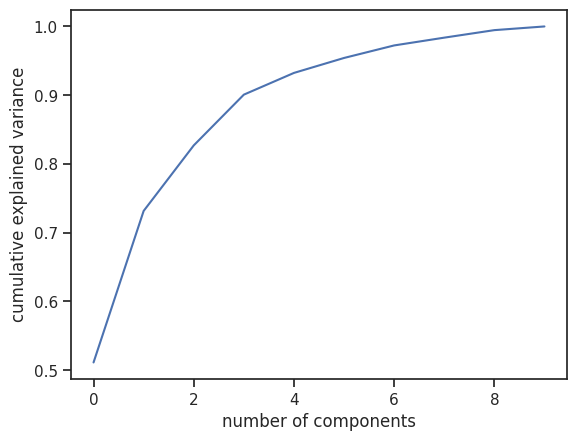

In [92]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [93]:
principal_df = pd.DataFrame(X_pca, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"])
principal_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    0.387326 -7.379449  6.073133 -0.729240  0.849762  0.053359 -1.054217   
1   -3.058053  1.016997  2.191223  2.629342 -0.579128 -1.221507  0.474526   
2    0.743584 -1.883008 -0.092460  4.014184 -2.288077 -1.644039 -3.266032   
3   -6.134146 -0.027163  0.630924  2.241319  0.414909 -0.889354 -0.047772   
4   -7.980747 -3.353213  1.094334  0.439660  0.329523 -0.874461  0.597757   
..        ...       ...       ...       ...       ...       ...       ...   
368  7.399529 -5.496795  4.301327 -1.809798 -2.283050 -0.516539  0.343342   
369  5.627975  3.158316 -1.993442 -1.600417  1.259557  1.462281 -0.409173   
370  7.729507  3.183328 -0.171030  1.053468 -0.822886  0.580425  0.782838   
371 -0.972417  7.528202  0.249351 -1.371643 -0.381498  0.425572  0.500063   
372  4.393790 -1.165640 -3.132441  1.125503 -0.769013 -0.174755  0.894546   

          PC8       PC9      PC10  
0    0.966484 -1.609587 -0.001909  
1    0.091297 -0.293009 -0.381380  
2   -2.354193 -2.924644 -0.852768  
3   -0.411996  0.290167 -0.039899  
4   -0.304956  0.230047  0.293161  
..        ...       ...       ...  
368  0.509941 -0.332143 -1.269113  
369 -0.889033  0.110217 -0.490092  
370  0.303554  0.810831  0.242648  
371  0.261744 -0.762519  0.171271  
372 -0.021538 -0.308921 -0.122439  

[373 rows x 10 columns]

In [94]:
final_pc = pd.concat([principal_df, df_mask["[Fe/H]"]], axis = 1)
len( df_mask["[Fe/H]"])

373

/tmp/ipykernel_375671/1132467788.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(principal_df["PC1"], principal_df["PC2"],


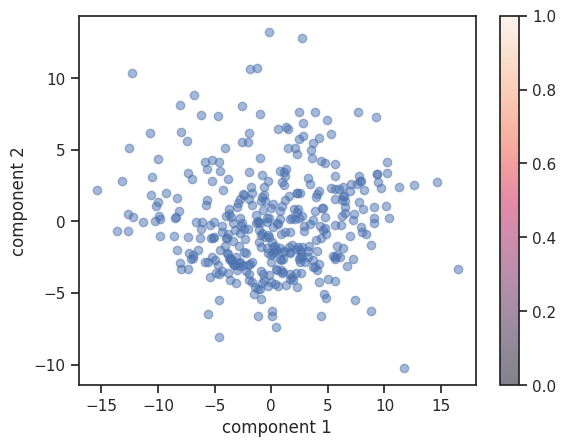

In [95]:
plt.scatter(principal_df["PC1"], principal_df["PC2"],
             alpha=0.5, 
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

/tmp/ipykernel_375671/1368053190.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(principal_df["PC1"], principal_df["PC3"],


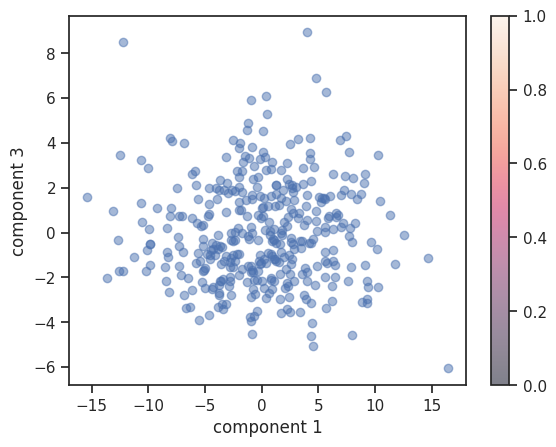

In [96]:
plt.scatter(principal_df["PC1"], principal_df["PC3"],
             alpha=0.5, 
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 3')
plt.colorbar();

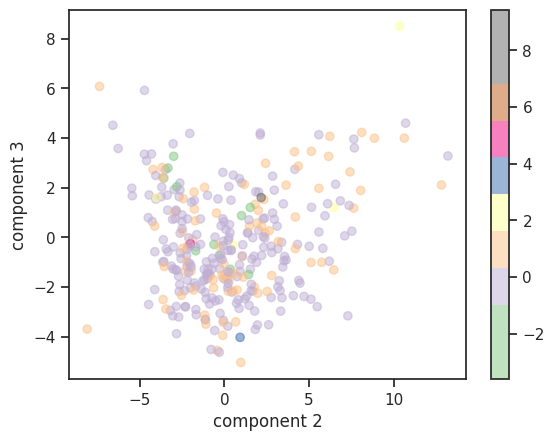

In [97]:
plt.scatter(principal_df["PC2"], principal_df["PC3"],
             alpha=0.5, c=df_mask["Plx"],
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 2')
plt.ylabel('component 3')
plt.colorbar();

In [98]:
df_mask["Plx"]

0      1.3761
8     -0.0595
11     0.7731
12     0.0448
17     0.0848
        ...  
658       NaN
659    0.0829
662    0.6957
664    0.1517
665    0.6532
Name: Plx, Length: 373, dtype: float64

/tmp/ipykernel_375671/3343206505.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(principal_df["PC1"], principal_df["PC4"],


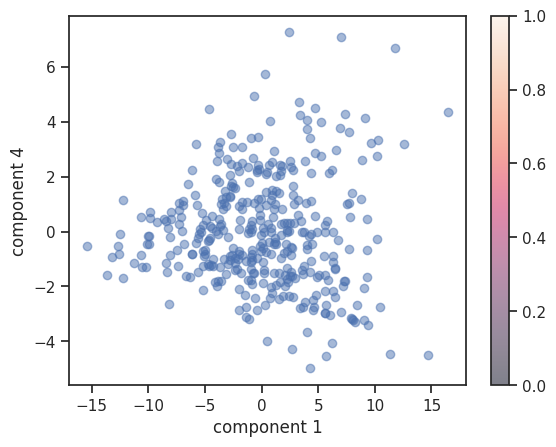

In [99]:
plt.scatter(principal_df["PC1"], principal_df["PC4"],
             alpha=0.5, 
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 4')
plt.colorbar();

/tmp/ipykernel_375671/2870524258.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(principal_df["PC1"], principal_df["PC5"],


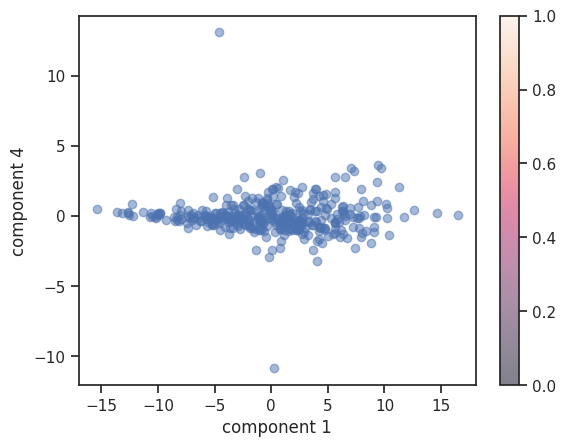

In [100]:
plt.scatter(principal_df["PC1"], principal_df["PC5"],
             alpha=0.5, 
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 4')
plt.colorbar();

# 2. UMAP

In [102]:
reducer = umap.UMAP(n_neighbors=100, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
                    n_components=3,
                    random_state=42)
X_trans = reducer.fit_transform(X_stand)


In [103]:
umap_df = pd.DataFrame(X_trans, columns = ["PC1", "PC2", "PC3"])
umap_df

PC1       PC2       PC3
0    10.695999  5.246027  4.985867
1    10.966638  8.365945  5.643659
2    10.166846  7.374176  4.306638
3    11.810477  8.398371  5.468197
4    12.849473  8.096316  5.032508
..         ...       ...       ...
368   9.075117  5.181747  5.322899
369   7.601505  7.240134  5.415900
370   7.933819  7.115449  5.868002
371  10.088762  9.100436  5.757336
372   8.804883  6.979579  4.789534

[373 rows x 3 columns]

/tmp/ipykernel_375671/3808956405.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_df["PC1"],umap_df["PC2"],


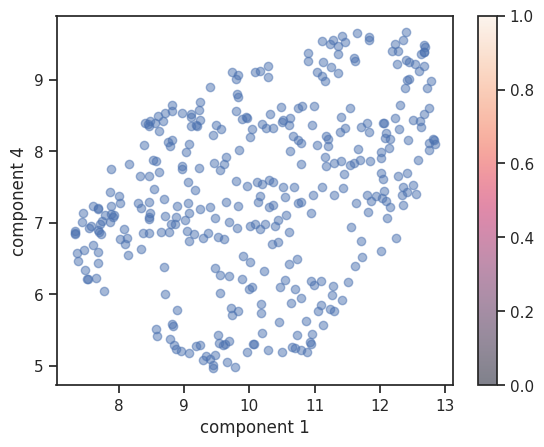

In [105]:
plt.scatter(umap_df["PC1"],umap_df["PC2"],
             alpha=0.5, 
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

/tmp/ipykernel_375671/2210904439.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_df["PC1"],umap_df["PC3"],


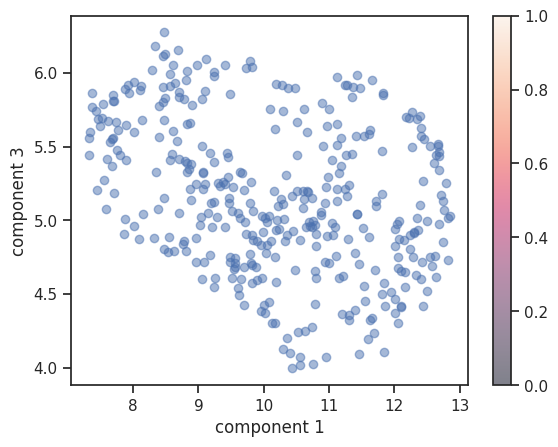

In [106]:
plt.scatter(umap_df["PC1"],umap_df["PC3"],
             alpha=0.5, 
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 3')
plt.colorbar();

/tmp/ipykernel_375671/1891528558.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_df["PC2"],umap_df["PC3"],


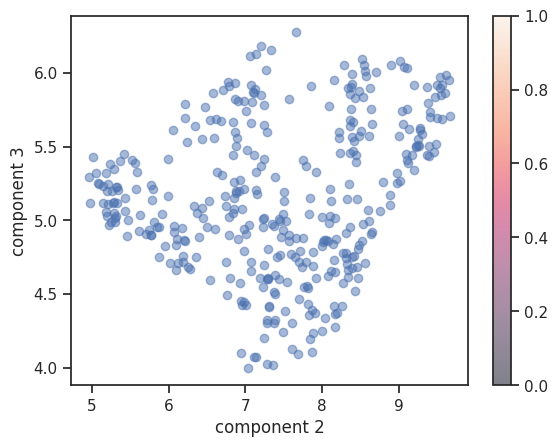

In [107]:
plt.scatter(umap_df["PC2"],umap_df["PC3"],
             alpha=0.5, 
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 2')
plt.ylabel('component 3')
plt.colorbar();

### Other ways to plot the umap results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


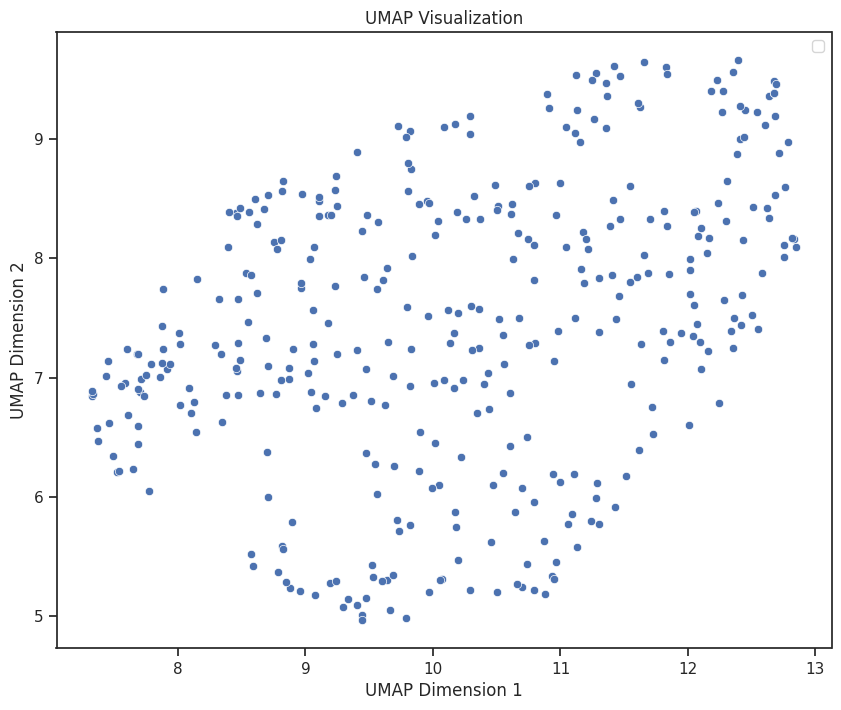

In [108]:


# Create a scatter plot with color mapping
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_df["PC1"], y=umap_df["PC2"])  # y_labels are the labels for each data point
plt.title("UMAP Visualization")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend()
plt.show()


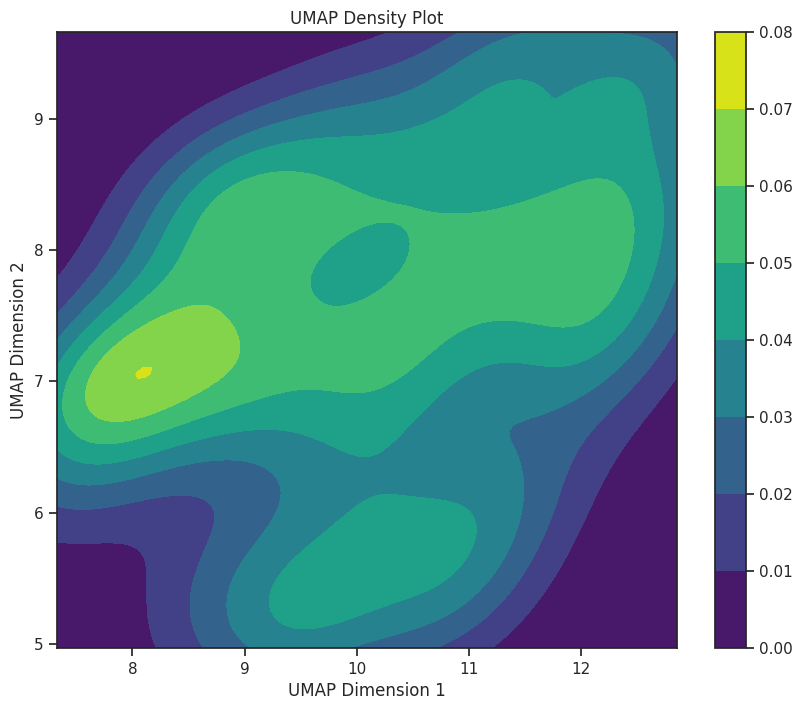

In [110]:
from scipy.stats import gaussian_kde

# Create a density plot
plt.figure(figsize=(10, 8))
x = umap_df["PC1"]
y = umap_df["PC2"]
kde = gaussian_kde([x, y])
x_vals, y_vals = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
z = kde(np.vstack([x_vals.ravel(), y_vals.ravel()]))
plt.contourf(x_vals, y_vals, z.reshape(x_vals.shape), cmap="viridis")
plt.colorbar()
plt.title("UMAP Density Plot")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

In [112]:
import plotly.express as px
# Create an interactive scatter plot using plotly
fig = px.scatter(x=umap_df["PC1"], y=umap_df["PC2"], title="Interactive UMAP Visualization")
fig.update_layout(xaxis_title="UMAP Dimension 1", yaxis_title="UMAP Dimension 2")
fig.show()
